# Bike Sharing Competition

In [ ]:
import numpy as np
import pandas as pd 
# import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Root Mean Squared Logarithmic Error (RMSLE) is the evaluation metric

: 

In [146]:
data_train = pd.read_csv('/Users/dj/Documents/GitHub/Playground/Playground/MachineLearning/BikeSharing/Data/bike_train.csv')
data_test = pd.read_csv('/Users/dj/Documents/GitHub/Playground/Playground/MachineLearning/BikeSharing/Data/bike_test.csv')

In [147]:
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [148]:
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [149]:
# First observation: The test set has fewer variables then the train set. Therefore, one can already omit the additional variables since the model can not use them later on in the real
# prediction. 

# Overview

In [150]:
data_train.describe() # By looking at the numerical variables, how is the data distributed

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [151]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [152]:
data_train.dtypes # Checking the data types within the data frame

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [153]:
data_train.isna().sum() # No missing data - Therefore, one does not have to impute anything. Otherwise, one should use KNN-Imputation

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Converting a column into another data type

In [154]:
# if the data type of a certain column should be changed:
#data_train['colname'] = data_train['colname'].astype('int')

In [155]:
# first column is string - but we want to have datetime
data_train['datetime'] = pd.to_datetime(data_train['datetime'], format="%Y-%m-%d %H:%M:%S") # datetime64[ns]

# Object to datetime64
data_train["datetime"] = data_train["datetime"].astype("datetime64")
 
# Setting the Date as index
data_train = data_train.set_index("datetime")

data_train.head() 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [156]:
data_train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [157]:
# Same for test data

# first column is string - but we want to have datetime
data_test['datetime'] = pd.to_datetime(data_test['datetime'], format="%Y-%m-%d %H:%M:%S") # datetime64[ns]

# Object to datetime64
# data_train["Dadatetimete"] = data_train["datetime"].astype("datetime64")
 
# Setting the Date as index
data_test = data_test.set_index("datetime")

data_test.head() 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Time Plot

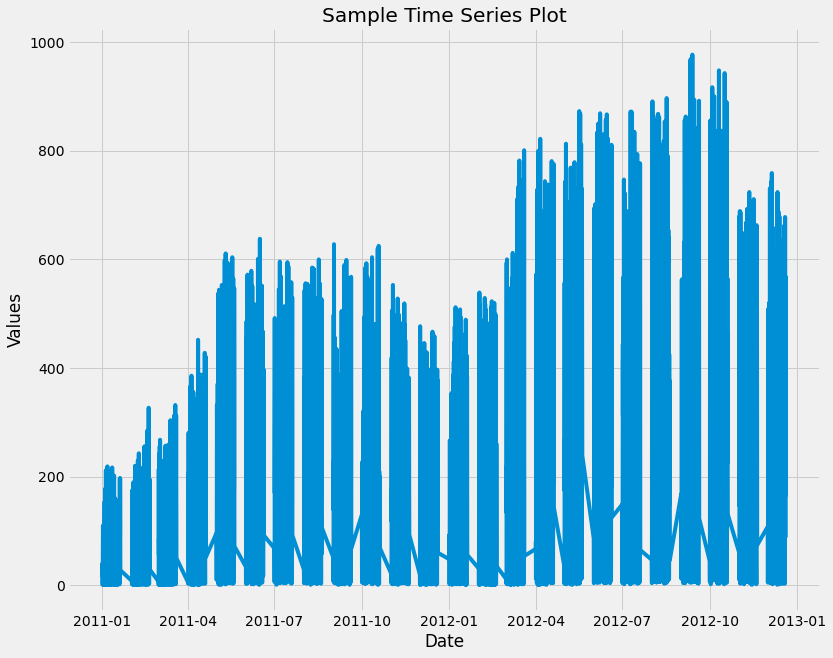

In [158]:
 # Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Sample Time Series Plot")
 
# plotting the "A" column alone
plt.plot(data_train["count"])

### Bar Plot

<BarContainer object of 10886 artists>

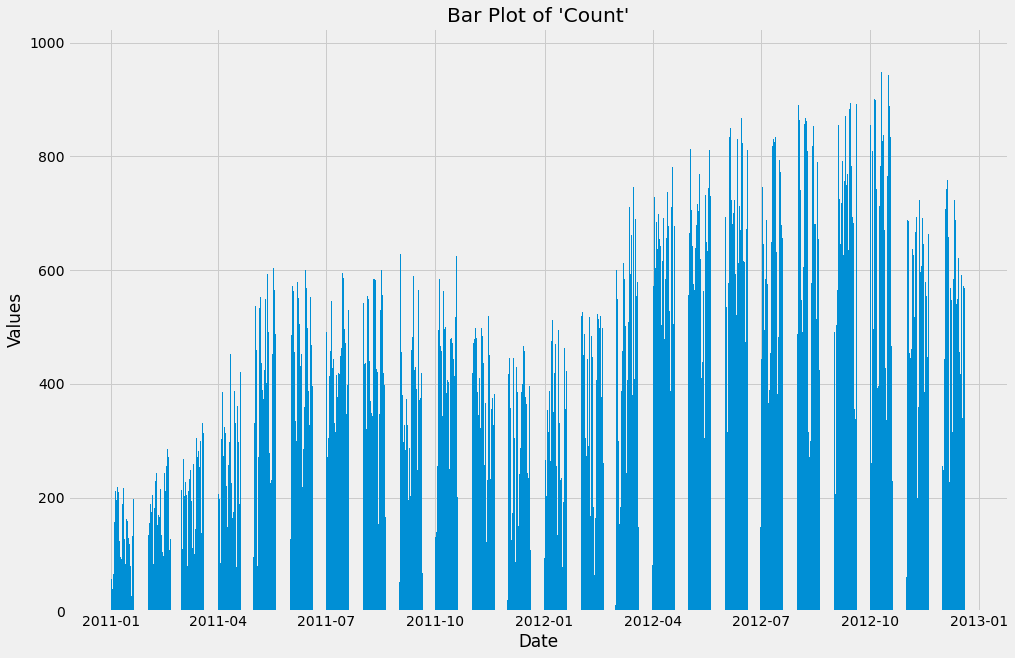

In [159]:
# setting figure size to 12, 10
plt.figure(figsize=(15, 10))
 
# Labelling the axes and setting a
# title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Bar Plot of 'Count'")
 
# plotting the "A" column alone
plt.bar(data_train.index, data_train["count"], width=0.5)

# KNN Imputation

In [160]:
from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# imputed = imputer.fit_transform(data_train)
# df_imputed = pd.DataFrame(imputed, columns=data_train.columns)

# Thats all there is. Please note that the imputation only works with numerical data. 

# One-Hot Encoder

In [161]:
example = pd.read_csv('/Users/dj/Documents/GitHub/Playground/Playground/MachineLearning/Data/ds_salaries.csv') # https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

one_hot = pd.get_dummies(example.salary_currency, prefix='salary_currency') # These can be concatinated to the old dataframe

new_dat = pd.concat([example, one_hot], axis = 1)

In [162]:
new_dat.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,...,1,0,0,0,0,0,0,0,0,0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,...,0,1,0,0,0,0,0,0,0,0
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,...,0,0,0,0,0,0,0,0,0,1


## One-Hot with sklearn

In [163]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
example['experience_level']=example['experience_level'].astype('category')
example['employment_type']=example['employment_type'].astype('category')
 
 
#Assigning numerical values and storing it in another columns
example['exlev_new']=example['experience_level'].cat.codes
example['emtype_new']=example['employment_type'].cat.codes

#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(example[['exlev_new','emtype_new']]).toarray())

#Merge with main
New_df=example.join(enc_data)
 

In [164]:
New_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,exlev_new,emtype_new,0,1,2,3,4,5,6,7
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,...,2,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,...,3,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,...,3,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,...,2,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,...,3,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Model

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris

x = data_train.drop('count',axis=1)
y = data_train['count']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [166]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=10, random_state=0)
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [168]:
pred = clf.predict(x_test);pred

array([143.02887925, 232.89756963, 361.02667571, ..., 187.14336653,
       709.38560281, 199.43773003])

In [169]:
from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


y_true = y_test
y_pred = pred
print(mean_squared_log_error(y_true, y_pred))

# print(mean_squared_log_error(y_true, y_pred, squared=False))

0.0005051541443285967


# Train with whole dataset and then do the real predictions

In [170]:
print(data_train.columns)
print(data_test.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')


In [171]:
x_train = data_train.drop(['count', 'casual', 'registered',],axis=1)
y_train = data_train['count']

rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [172]:
sol = rf.predict(data_test);sol

array([148.36084792,  67.38757212,  67.38757212, ...,  82.82570765,
        73.09623563,  67.97296824])

In [174]:
sol = np.round(sol)

final_sol = pd.concat([pd.DataFrame(data_test.index), pd.DataFrame(sol)], axis=1)

final_sol.rename(columns = {0:'count'}, inplace = True)

final_sol = final_sol.set_index("datetime")

In [83]:
final_sol

,count
datetime,
2011-01-20 00:00:00,148.0
2011-01-20 01:00:00,67.0
2011-01-20 02:00:00,67.0
2011-01-20 03:00:00,79.0
2011-01-20 04:00:00,79.0
...,...
2012-12-31 19:00:00,106.0
2012-12-31 20:00:00,106.0
2012-12-31 21:00:00,83.0


In [84]:
final_sol.to_csv('submission.csv')

# Using time data - correct

In [175]:
data_train = pd.read_csv('/Users/dj/Documents/GitHub/Playground/Playground/MachineLearning/BikeSharing/Data/bike_train.csv')
data_test = pd.read_csv('/Users/dj/Documents/GitHub/Playground/Playground/MachineLearning/BikeSharing/Data/bike_test.csv')

In [176]:
# Create new features
df = data_train

df['datetime'] = pd.to_datetime(data_train['datetime'], format="%Y-%m-%d %H:%M:%S")
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['dayofyear'] = pd.DatetimeIndex(df['datetime']).dayofyear
df['weekofyear'] = pd.DatetimeIndex(df['datetime']).weekofyear
df['weekday'] = pd.DatetimeIndex(df['datetime']).weekday
df['quarter'] = pd.DatetimeIndex(df['datetime']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['datetime']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['datetime']).is_month_end

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


### Dummy Coding

In [177]:
# Dummy Coding

df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')
df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')
df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')
df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')
df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')

In [178]:
df.shape

(10886, 37)

# Same for Test data

In [179]:
# Create new features
df_test = data_test

df_test['datetime'] = pd.to_datetime(df_test['datetime'], format="%Y-%m-%d %H:%M:%S")
df_test['year'] = pd.DatetimeIndex(df_test['datetime']).year
df_test['month'] = pd.DatetimeIndex(df_test['datetime']).month
df_test['day'] = pd.DatetimeIndex(df_test['datetime']).day
df_test['dayofyear'] = pd.DatetimeIndex(df_test['datetime']).dayofyear
df_test['weekofyear'] = pd.DatetimeIndex(df_test['datetime']).weekofyear
df_test['weekday'] = pd.DatetimeIndex(df_test['datetime']).weekday
df_test['quarter'] = pd.DatetimeIndex(df_test['datetime']).quarter
df_test['is_month_start'] = pd.DatetimeIndex(df_test['datetime']).is_month_start
df_test['is_month_end'] = pd.DatetimeIndex(df_test['datetime']).is_month_end

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


In [180]:
# Dummy Coding

df_test = pd.get_dummies(df_test, columns=['year'], drop_first=True, prefix='year')
df_test = pd.get_dummies(df_test, columns=['month'], drop_first=True, prefix='month')
df_test = pd.get_dummies(df_test, columns=['weekday'], drop_first=True, prefix='wday')
df_test = pd.get_dummies(df_test, columns=['quarter'], drop_first=True, prefix='qrtr')
df_test = pd.get_dummies(df_test, columns=['is_month_start'], drop_first=True, prefix='m_start')
df_test = pd.get_dummies(df_test, columns=['is_month_end'], drop_first=True, prefix='m_end')

In [182]:
print(df_test.shape)
print(df.shape)

(6493, 34)
(10886, 37)


# Split Data Again

In [203]:
x = df.drop(['count', 'datetime', 'casual', 'registered',],axis=1)
y = df['count']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [205]:
#RF model
model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(x_train, y_train) 
pred_train_rf= model_rf.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

52.9048749884501
0.9143348409156924
136.01531423951158
0.4454313242843839


# The whole Data

In [195]:
x = df.drop(['count', 'datetime', 'casual', 'registered', 'datetime'],axis=1)
y = df['count']

test_x = df_test.drop(['datetime'], axis = 1)

#RF model
model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(x, y) 
pred_train_rf= model_rf.predict(test_x)

In [197]:
sol = np.round(pred_train_rf)

final_sol = pd.concat([pd.DataFrame(data_test['datetime']), pd.DataFrame(sol)], axis=1)

final_sol.rename(columns = {0:'count'}, inplace = True)

final_sol = final_sol.set_index("datetime")

In [200]:
final_sol.to_csv('final_sub.csv')